# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [1]:
#Import all the necessary modules


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [1]:
import pandas as pd
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
pima_df = pd.read_csv('pima-indians-diabetes-1.data',names=colnames)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [2]:
pima_df.head(10)

,preg,glu,bp,sft,ins,bmi,dpf,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [3]:
pima_df.dtypes

preg         int64
glu          int64
bp           int64
sft          int64
ins          int64
bmi        float64
dpf        float64
age          int64
outcome      int64
dtype: object

In [4]:
pima_df.shape

(768, 9)

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [5]:
pima_df.isin([0]).sum()
#preg       111
#glu          5
#bp          35
#sft        227
#ins        374
#bmi         11
#dpf          0
#age          0
#outcome    500; As outcome is dependant variable so will keep the col untouched

preg       111
glu          5
bp          35
sft        227
ins        374
bmi         11
dpf          0
age          0
outcome    500
dtype: int64

In [6]:
pima_df['preg'] = pima_df['preg'].replace(0,pima_df['preg'].median())
pima_df['glu'] = pima_df['glu'].replace(0,pima_df['glu'].median())
pima_df['bp'] = pima_df['bp'].replace(0,pima_df['bp'].median())
pima_df['sft'] = pima_df['sft'].replace(0,pima_df['sft'].median())
pima_df['ins'] = pima_df['ins'].replace(0,pima_df['ins'].median())
pima_df['bmi'] = pima_df['bmi'].replace(0,pima_df['bmi'].median())

# Q5 Print the descriptive statistics of each & every column using describe() function

In [7]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
preg,768.0,4.278646,3.021516,1.000,2.00000,3.0000,6.00000,17.00
glu,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
bp,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
sft,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
ins,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
bmi,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
dpf,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

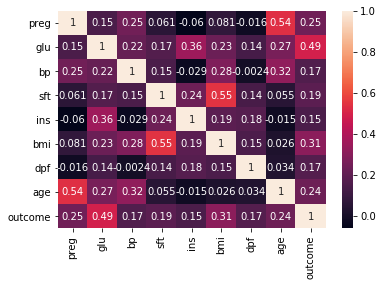

In [9]:
import seaborn as sns
sns.heatmap( pima_df.corr(), annot=True)

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
X=pima_df[['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age']]
Y=pima_df['outcome']

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=0)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [12]:
model=DecisionTreeClassifier(criterion = 'entropy',max_depth=5)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [13]:
ypred=model.predict(xtest)
acc=metrics.accuracy_score(ytest,ypred)
print(acc)
cm=metrics.confusion_matrix(ytest,ypred)
print(cm)

0.7878787878787878
[[134  23]
 [ 26  48]]


Print the feature importance of the decision model - Optional

In [14]:
print (pd.DataFrame(model.feature_importances_, columns = ["outcome"], index = xtrain.columns))

       outcome
preg  0.064181
glu   0.478965
bp    0.011811
sft   0.039746
ins   0.000000
bmi   0.171636
dpf   0.081947
age   0.151713


In [ ]:
#Max depth of none is giving accuracy of 72% wherewas a max depth of 5 is yeilding accuracy of 79%
# from feature importance metrics, if i drop the ins col. then the accuracy is increasing further

# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=55,criterion='entropy',max_depth=5,random_state=0 )
model_rf.fit(xtrain, ytrain)
y_predict = model_rf.predict(xtest)
acc_rf=metrics.accuracy_score(ytest,y_predict)
print(acc_rf)
cm_rf=metrics.confusion_matrix(ytest,y_predict)
print(cm_rf)

0.7748917748917749
[[144  13]
 [ 39  35]]


In [ ]:
# Decesion tree with depth of 5 is giving better accuracy then random forest.

# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [29]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=model_rf,n_estimators= 51)
abcl.fit(xtrain,ytrain)
abcl.score

<bound method ClassifierMixin.score of AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=51, random_state=None)>

In [30]:
#Ytest = ytest.values.reshape(-1,1)
abcl_predict = abcl.predict(xtest)
acc_abcl=metrics.accuracy_score(ytest, abcl_predict)
print(acc_abcl)
cm_abcl=metrics.confusion_matrix(ytest,abcl_predict)
print(cm_abcl)

0.7792207792207793
[[136  21]
 [ 30  44]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [31]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=model_rf,n_estimators=51,oob_score=True)
bgcl.fit(xtrain,ytrain)
bgcl_score = bgcl.oob_score_
print ('bagging classifier score is :',bgcl_score)

bagging classifier score is : 0.7653631284916201


In [32]:
Ytest = ytest.values.reshape(-1,1)
bgcl_predict = bgcl.predict(xtest)
acc_bgcl=metrics.accuracy_score(Ytest, bgcl_predict)
print(acc_bgcl)
cm_bgcl=metrics.confusion_matrix(Ytest,bgcl_predict)
print(cm_bgcl)

0.7619047619047619
[[142  15]
 [ 40  34]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 51)
gbcl.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=51,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [34]:
gbcl_predict = gbcl.predict(xtest)
acc_gbcl=metrics.accuracy_score(ytest, gbcl_predict)
print(acc_gbcl)
cm_gbcl=metrics.confusion_matrix(ytest,gbcl_predict)
print(cm_gbcl)

0.7792207792207793
[[138  19]
 [ 32  42]]


In [ ]:
#Accuracy Score of each model:
# Decision Tree (max depth: 5) : 79%
# Ramdom forest: 77%
# Appling Ensemble technique:
# Adaboost : 78%
# Bagging : 76%
# Gradient boosting: 78%
# I beleieve we should apply K fold validation to confirm which model should be used as both are quite close.

# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.